In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('mode.chained_assignment', None)

ticker = "GOOGL"
df = yf.download(ticker, start="2021-01-02", end="2022-1-1")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1760.000000,1762.489990,1707.140015,1726.130005,1726.130005,1866200
2021-01-05,1725.089966,1746.829956,1716.900024,1740.050049,1740.050049,1018000
2021-01-06,1700.260010,1743.969971,1696.099976,1722.880005,1722.880005,2329400
2021-01-07,1726.760010,1777.819946,1726.760010,1774.339966,1774.339966,2096800
2021-01-08,1777.160034,1799.359985,1761.219971,1797.829956,1797.829956,1774200


In [2]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2021-03-16,2065.989990,2113.679932,2059.290039,2083.889893,2083.889893,1595000,2051.532996,1959.137598
2021-03-17,2068.469971,2099.000000,2044.119995,2082.219971,2082.219971,1319100,2058.613989,1966.259397
2021-03-18,2048.179932,2068.750000,2019.180054,2021.339966,2021.339966,1585000,2057.354980,1971.885195
2021-03-19,2029.729980,2037.040039,2002.930054,2026.959961,2026.959961,2303600,2050.343970,1977.966794
2021-03-22,2027.630005,2048.340088,2014.000000,2030.689941,2030.689941,1676800,2052.662964,1983.093794


In [3]:
conditions = [df['MA10'] > df['MA50'], 
              df['MA10'] < df['MA50']]

#define choices
choices = [1, 0]

#create new column in DataFrame that displays results of comparisons
df['Position']= np.select(conditions, choices)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Position
Date,,,,,,,,,
2021-03-16,2065.989990,2113.679932,2059.290039,2083.889893,2083.889893,1595000,2051.532996,1959.137598,1
2021-03-17,2068.469971,2099.000000,2044.119995,2082.219971,2082.219971,1319100,2058.613989,1966.259397,1
2021-03-18,2048.179932,2068.750000,2019.180054,2021.339966,2021.339966,1585000,2057.354980,1971.885195,1
2021-03-19,2029.729980,2037.040039,2002.930054,2026.959961,2026.959961,2303600,2050.343970,1977.966794,1
2021-03-22,2027.630005,2048.340088,2014.000000,2030.689941,2030.689941,1676800,2052.662964,1983.093794,1


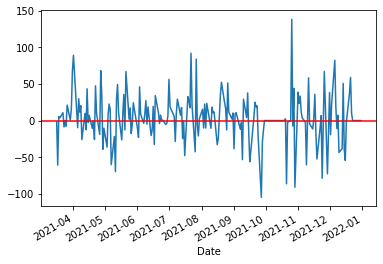

In [4]:
df['Close_Next'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[i, 'Close_Next'] - df.loc[i, 'Close'] if df.loc[i, 'Position']==1 else 0 for i in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')

<AxesSubplot:xlabel='Date'>

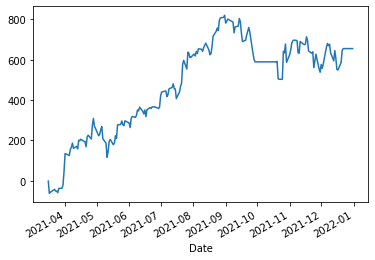

In [5]:
df['Cum_Profit'] = df['Profit'].cumsum()
df['Cum_Profit'].plot()